In [5]:
import numpy as np
import pandas as pd
import seaborn as sns #making statistical graphics in Python.
import spacy #nlp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from gensim.models import KeyedVectors
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

In [6]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

In [8]:
print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

Spliting Dataset -- feature-target & train-test -- split

In [9]:
X = wine_df.drop('target', axis=1)
y = wine_df['target']

     

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Appying algorithms

Linear Regression
 Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [10]:
print("Linear Regression:")
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_predictions = linear_reg_model.predict(X_test)

# Evaluate the performance
linear_reg_accuracy = linear_reg_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_predictions)
r2 = r2_score(y_test, y_predictions)

print("Accuracy:", linear_reg_accuracy)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Linear Regression:
Accuracy: 0.8825140263270388
Mean Squared Error: 0.06853348464256072
R-squared: 0.8825140263270388


Logistic Regression
predict the probability that an instance of belonging to a given class.  it takes the output of the linear regression function as input and uses a sigmoid function to estimate the probability for the given class.


Logistic Regression:
Accuracy: 100.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


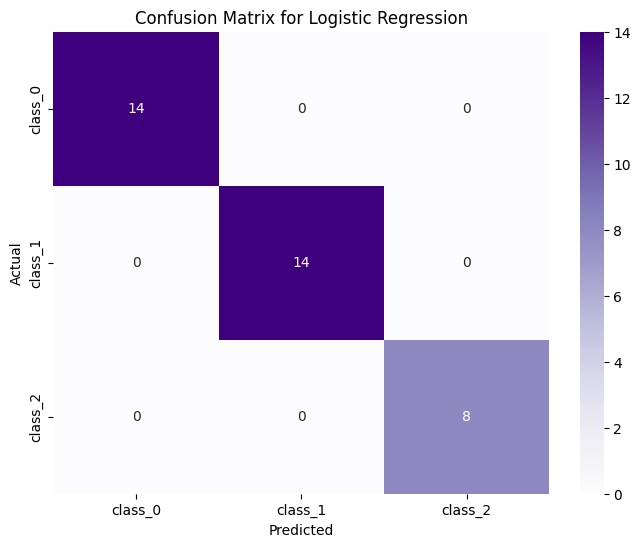

In [11]:
print("\nLogistic Regression:")
logistic_reg_model = LogisticRegression(max_iter=10000)
logistic_reg_model.fit(X_train, y_train)
y_predictions = logistic_reg_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_predictions)*100
classification_rep = classification_report(y_test, y_predictions)
confusion_mat = confusion_matrix(y_test, y_predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Purples', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Decision Tree



Decision Tree:
Accuracy: 94.44444444444444

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        14
         1.0       0.88      1.00      0.93        14
         2.0       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


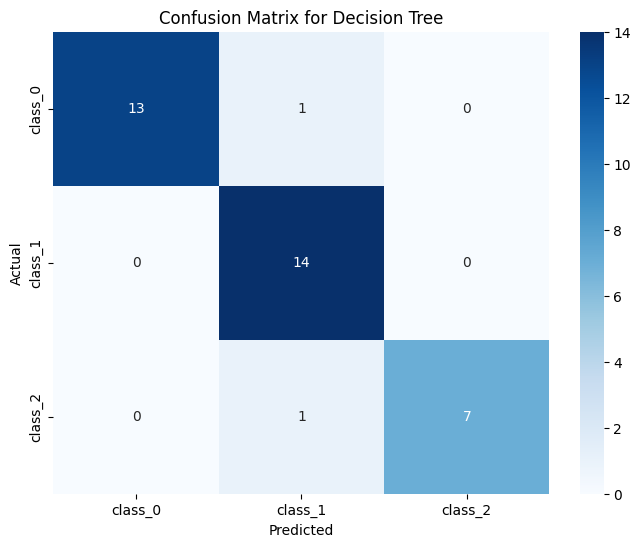

In [12]:
print("\nDecision Tree:")
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_predictions = decision_tree_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_predictions)*100
classification_rep = classification_report(y_test, y_predictions)
confusion_mat = confusion_matrix(y_test, y_predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

SVM
The main objective of the SVM algorithm is to find the optimal hyperplane in an N-dimensional space that can separate the data points in different classes in the feature space. The hyperplane tries that the margin between the closest points of different classes should be as maximum as possible. 


SVM:
Accuracy: 80.55555555555556

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       0.73      0.79      0.76        14
         2.0       0.57      0.50      0.53         8

    accuracy                           0.81        36
   macro avg       0.77      0.76      0.76        36
weighted avg       0.80      0.81      0.80        36


Confusion Matrix:
 [[14  0  0]
 [ 0 11  3]
 [ 0  4  4]]


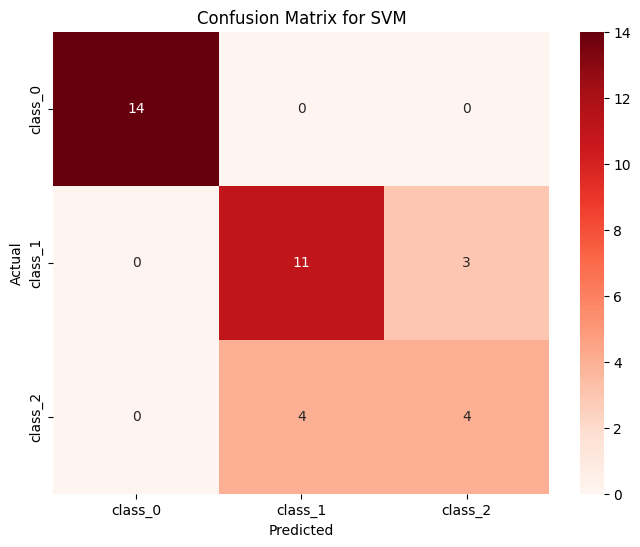

In [13]:
print("\nSVM:")
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_predictions = svm_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_predictions)*100
classification_rep = classification_report(y_test, y_predictions)
confusion_mat = confusion_matrix(y_test, y_predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

Naive-Bayes Algorithm


Naive-Bayes Algorithm:
Accuracy: 88.88888888888889

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        14
         1.0       0.93      0.93      0.93        14
         2.0       0.83      0.62      0.71         8

    accuracy                           0.89        36
   macro avg       0.88      0.85      0.86        36
weighted avg       0.89      0.89      0.88        36


Confusion Matrix:
 [[14  0  0]
 [ 0 13  1]
 [ 2  1  5]]


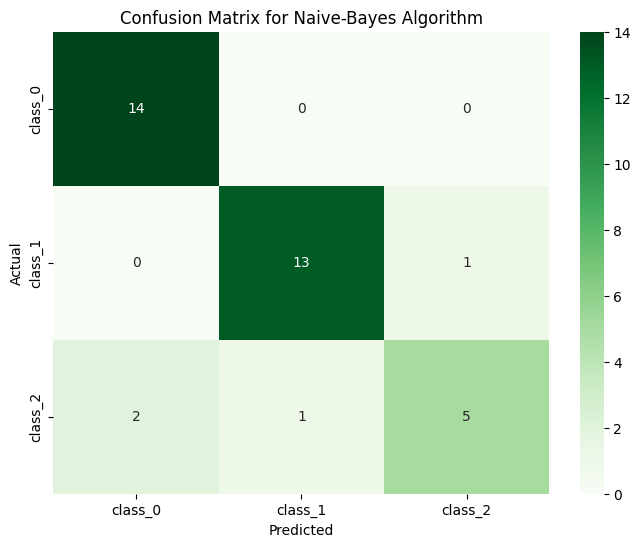

In [14]:
print("\nNaive-Bayes Algorithm:")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, nb_predictions)*100
classification_rep = classification_report(y_test,nb_predictions)
confusion_mat = confusion_matrix(y_test,nb_predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Greens', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive-Bayes Algorithm')
plt.show()

For text based algorithms

In [15]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

num_samples = 800
x_train = x_train[:num_samples]
y_train = y_train[:num_samples]
x_test = x_test[:num_samples]
y_test = y_test[:num_samples]


# Convert sequences back to text
def sequences_to_texts(sequences):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequences])

# Convert sequences to text
x_train_text = [sequences_to_texts(seq) for seq in x_train]
x_test_text = [sequences_to_texts(seq) for seq in x_test]

1641221/1641221 [==============================] - 2s 1us/step


In [16]:
y_train = y_train[:len(x_train_text)]

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_text, y_train, test_size=0.2, stratify=y_train, random_state=42)

TF-IDF

In [17]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_val_tfidf = vectorizer.transform(x_val)
x_test_tfidf = vectorizer.transform(x_test_text)

# Logistic Regression (as an example)
logistic_reg_model = LogisticRegression(max_iter=10000)
logistic_reg_model.fit(x_train_tfidf, y_train)

# Predictions
y_val_pred = logistic_reg_model.predict(x_val_tfidf)
y_test_pred = logistic_reg_model.predict(x_test_tfidf)

# Evaluate the model
val_accuracy = accuracy_score(y_val, y_val_pred)*100
test_accuracy = accuracy_score(y_test, y_test_pred)*100

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 74.375
Test Accuracy: 75.625


Word2Vec

In [18]:
tokenized_x_train = [text.split() for text in x_train]
tokenized_x_val = [text.split() for text in x_val]
tokenized_x_test = [text.split() for text in x_test_text]

# Train model
word2vec_model = Word2Vec(sentences=tokenized_x_train, vector_size=100, window=5, min_count=1, workers=4)

# Transform each text sequence into the average Word2Vec vector
def text_to_avg_vector(text, model):
    words = text.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        # If no word in the model, return a zero vector
        return np.zeros(model.vector_size)

# Create Word2Vec vectors for training, validation, and test sets
x_train_w2v = np.array([text_to_avg_vector(text, word2vec_model) for text in x_train])
x_val_w2v = np.array([text_to_avg_vector(text, word2vec_model) for text in x_val])
x_test_w2v = np.array([text_to_avg_vector(text, word2vec_model) for text in x_test_text])

print("Word2Vec Vector for the first training sample:")
print(x_train_w2v[0])

# Train a Logistic Regression model
logistic_reg_model = LogisticRegression(max_iter=10000)
logistic_reg_model.fit(x_train_w2v, y_train)

# Predictions
y_val_pred = logistic_reg_model.predict(x_val_w2v)
y_test_pred = logistic_reg_model.predict(x_test_w2v)

# Evaluations
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)
     

Word2Vec Vector for the first training sample:
[-0.07268322  0.25268802  0.26587042  0.09287518  0.21239528 -0.7850829
  0.3421153   1.2695053  -0.43114775 -0.42154643 -0.12708566 -0.839757
 -0.05962669  0.3339929   0.30492502 -0.1690556   0.12395059 -0.4036287
  0.00990703 -1.3255918   0.35484874  0.01886199  0.45223507 -0.24740112
  0.05650634 -0.05738316 -0.51470935 -0.25580898 -0.4023479   0.157791
  0.70376045  0.0735734   0.58322763 -0.67478245 -0.18155314  0.44942492
  0.01288352 -0.45418915 -0.3603252  -0.829354    0.19876269 -0.6069353
 -0.39052778  0.18362181  0.36708516 -0.20465481 -0.41350055 -0.19189402
  0.21224578  0.56967205  0.28251633 -0.47666496 -0.28955355 -0.06635001
 -0.14789546  0.01141435  0.40433115 -0.2301846  -0.4775096   0.21193397
  0.13567951 -0.09689003  0.30521524 -0.10665972 -0.67545414  0.66454893
  0.10919891  0.4693322  -0.9856679   0.7136199   0.12924546  0.4509865
  0.6523599  -0.05772368  0.7705553  -0.03184076  0.19875383  0.09669997
 -0.3018561 

Glove Algorithm

In [20]:
nlp = spacy.load("en_core_web_sm")


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [21]:
import spacy

# Download and install the 'en_core_web_sm' model
spacy.cli.download("en_core_web_sm")

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [22]:
# nlp = spacy.load("en_core_web_sm")

# Transform each text sequence into the average GloVe vector
def text_to_avg_vector(text, nlp):
    doc = nlp(text)
    vectors = [token.vector for token in doc]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        # If no vector is obtained, return a zero vector
        return np.zeros(nlp.vocab.vectors_length)

# Create GloVe vectors for training, validation, and test sets
x_train_glove = np.array([text_to_avg_vector(text, nlp) for text in x_train])
x_val_glove = np.array([text_to_avg_vector(text, nlp) for text in x_val])
x_test_glove = np.array([text_to_avg_vector(text, nlp) for text in x_test_text])

print("GloVe Vector for the first training sample:")
print(x_train_glove[0])

# Train a Logistic Regression model (as an example)
logistic_reg_model = LogisticRegression(max_iter=10000)
logistic_reg_model.fit(x_train_glove, y_train)

# Predictions
y_val_pred = logistic_reg_model.predict(x_val_glove)
y_test_pred = logistic_reg_model.predict(x_test_glove)

# Evaluations
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

GloVe Vector for the first training sample:
[ 1.66477233e-01 -3.17241341e-01  6.73630089e-02  1.48531750e-01
 -1.09376751e-01 -3.11614394e-01  1.01821765e-01  1.16974249e-01
  5.95108829e-02  2.16548219e-01 -1.87735945e-01 -1.27771462e-03
 -1.16288163e-01  1.96452737e-01 -1.70024946e-01 -4.51310538e-02
  1.72439739e-01 -1.07404636e-02 -1.90491620e-02  9.17453095e-02
  1.08228236e-01  3.47655505e-01 -1.16071500e-01 -4.21948284e-01
  6.69538900e-02 -2.72178262e-01  2.10364684e-01  1.10089391e-01
  2.20819876e-01  1.13416560e-01  7.15986341e-02  8.06174129e-02
  3.14722568e-01 -2.49378473e-01  7.42536113e-02 -2.88019985e-01
  7.71413893e-02 -1.44667223e-01 -4.57973294e-02 -1.26399159e-01
 -3.36126745e-01  2.92700052e-01 -1.61031559e-02  2.27942586e-01
  1.36119172e-01  1.43574357e-01 -1.36727139e-01  1.97218016e-01
 -3.18521336e-02 -4.02044579e-02 -5.20983279e-01  1.30398870e-01
 -1.23933479e-01 -9.46280733e-02 -7.38999443e-05  3.51094641e-02
  1.25813633e-01  5.04046492e-02 -1.23174852e-

Lemmatization - NLP

In [23]:
def lemmatize_text(text, nlp):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

# Example larger text
sample_text = """
Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans using natural language. It involves the development of algorithms and models to understand, interpret, and generate human-like language.
NLP tasks include text analysis, sentiment analysis, machine translation, named entity recognition, and more. One common preprocessing step in NLP is lemmatization, where words are reduced to their base or root form.
For example, the word "running" would be lemmatized to "run," and "better" would be lemmatized to "good." Lemmatization helps in standardizing words, reducing vocabulary size, and improving the efficiency of text analysis.
SpaCy is a popular library for NLP in Python that provides pre-trained models for lemmatization, part-of-speech tagging, and other tasks.
"""

# Lemmatize the larger text
lemmatized_sample_text = lemmatize_text(sample_text, nlp)

# Print the lemmatized text
print("Original text:")
print(sample_text)

print("\nLemmatized text:")
print(lemmatized_sample_text)

Original text:

Natural language processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans using natural language. It involves the development of algorithms and models to understand, interpret, and generate human-like language.
NLP tasks include text analysis, sentiment analysis, machine translation, named entity recognition, and more. One common preprocessing step in NLP is lemmatization, where words are reduced to their base or root form.
For example, the word "running" would be lemmatized to "run," and "better" would be lemmatized to "good." Lemmatization helps in standardizing words, reducing vocabulary size, and improving the efficiency of text analysis.
SpaCy is a popular library for NLP in Python that provides pre-trained models for lemmatization, part-of-speech tagging, and other tasks.


Lemmatized text:

 natural language processing ( NLP ) be a subfield of artificial intelligence that focus on the interaction betwe

Recurrent NN

In [24]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Limit the dataset for faster execution (you can adjust this based on your resources)
num_samples = 5000
x_train = x_train[:num_samples]
y_train = y_train[:num_samples]
x_test = x_test[:num_samples]
y_test = y_test[:num_samples]
# Pad sequences to have the same length
maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy*100)

Epoch 1/5
63/63 [==============================] - 17s 121ms/step - loss: 0.6693 - accuracy: 0.5960 - val_loss: 0.5925 - val_accuracy: 0.7290
Epoch 2/5
63/63 [==============================] - 7s 105ms/step - loss: 0.4318 - accuracy: 0.8200 - val_loss: 0.4230 - val_accuracy: 0.8110
Epoch 3/5
63/63 [==============================] - 7s 105ms/step - loss: 0.2268 - accuracy: 0.9245 - val_loss: 0.4612 - val_accuracy: 0.8110
Epoch 4/5
63/63 [==============================] - 7s 106ms/step - loss: 0.1195 - accuracy: 0.9668 - val_loss: 0.5012 - val_accuracy: 0.7960
Epoch 5/5
157/157 [==============================] - 4s 25ms/step - loss: 0.6495 - accuracy: 0.7866
Test Accuracy: 78.65999937057495
